In [14]:
import pandas
from scipy.io import arff
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [2]:
#Read in data

data = arff.loadarff('./data/train.arff')
df = pandas.DataFrame(data[0])

# Convert to utf-0
for column in df.select_dtypes([object]).columns:
    df[column] = df[column].str.decode('utf-8').astype(int)

df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
df.shape

(11055, 31)

In [4]:
# Remove duplicates

print(f"Duplicates: {df.duplicated().sum()}")

df = df.drop_duplicates()

Duplicates: 5206


In [5]:
# Describe the data
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,...,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000,5849.000000
mean,0.132843,-0.616003,0.720294,0.588648,0.718242,-0.760301,0.065823,0.149085,-0.305864,0.581809,...,0.564028,0.785604,0.021371,0.475124,0.233886,-0.423833,0.661823,0.347752,0.697042,-0.032313
std,0.991222,0.777323,0.693728,0.808459,0.695852,0.649627,0.802448,0.924473,0.952157,0.813395,...,0.825826,0.618782,0.999857,0.879994,0.826010,0.905818,0.749725,0.579027,0.717091,0.999563
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Result
-1    3019
 1    2830
Name: count, dtype: int64


<Axes: >

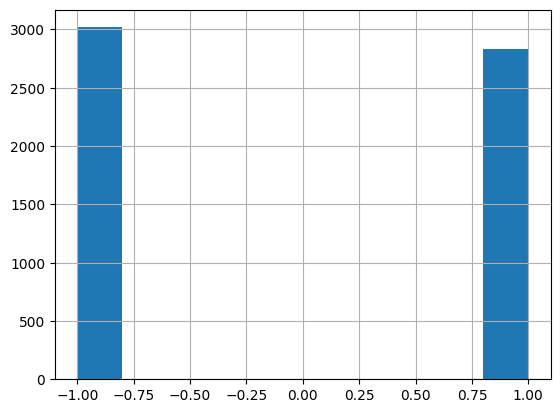

In [6]:
#Count classes

print(df['Result'].value_counts())
df['Result'].hist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5849 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            5849 non-null   int64
 1   URL_Length                   5849 non-null   int64
 2   Shortining_Service           5849 non-null   int64
 3   having_At_Symbol             5849 non-null   int64
 4   double_slash_redirecting     5849 non-null   int64
 5   Prefix_Suffix                5849 non-null   int64
 6   having_Sub_Domain            5849 non-null   int64
 7   SSLfinal_State               5849 non-null   int64
 8   Domain_registeration_length  5849 non-null   int64
 9   Favicon                      5849 non-null   int64
 10  port                         5849 non-null   int64
 11  HTTPS_token                  5849 non-null   int64
 12  Request_URL                  5849 non-null   int64
 13  URL_of_Anchor                5849 non-null   int64
 

array([[<Axes: title={'center': 'having_IP_Address'}>,
        <Axes: title={'center': 'URL_Length'}>,
        <Axes: title={'center': 'Shortining_Service'}>,
        <Axes: title={'center': 'having_At_Symbol'}>,
        <Axes: title={'center': 'double_slash_redirecting'}>,
        <Axes: title={'center': 'Prefix_Suffix'}>],
       [<Axes: title={'center': 'having_Sub_Domain'}>,
        <Axes: title={'center': 'SSLfinal_State'}>,
        <Axes: title={'center': 'Domain_registeration_length'}>,
        <Axes: title={'center': 'Favicon'}>,
        <Axes: title={'center': 'port'}>,
        <Axes: title={'center': 'HTTPS_token'}>],
       [<Axes: title={'center': 'Request_URL'}>,
        <Axes: title={'center': 'URL_of_Anchor'}>,
        <Axes: title={'center': 'Links_in_tags'}>,
        <Axes: title={'center': 'SFH'}>,
        <Axes: title={'center': 'Submitting_to_email'}>,
        <Axes: title={'center': 'Abnormal_URL'}>],
       [<Axes: title={'center': 'Redirect'}>,
        <Axes: tit

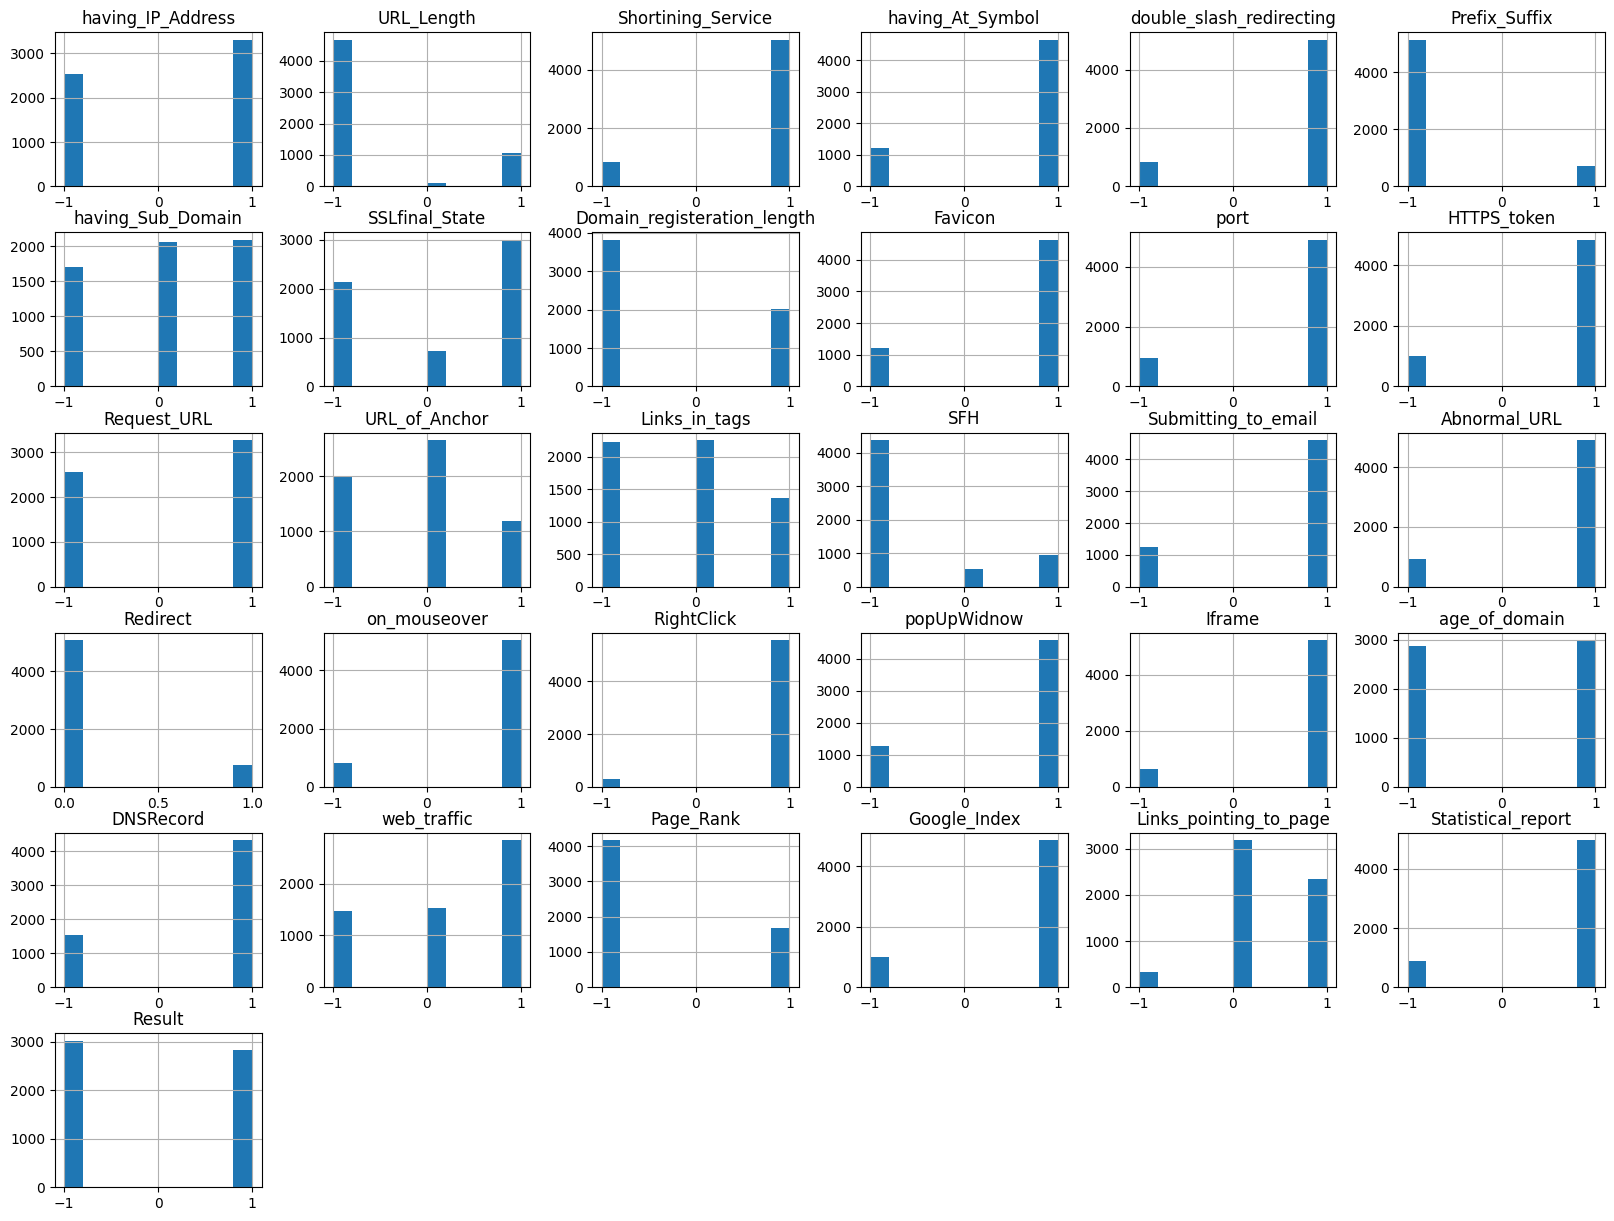

In [8]:
# Plot result distribution

df.hist(figsize=(20,15))

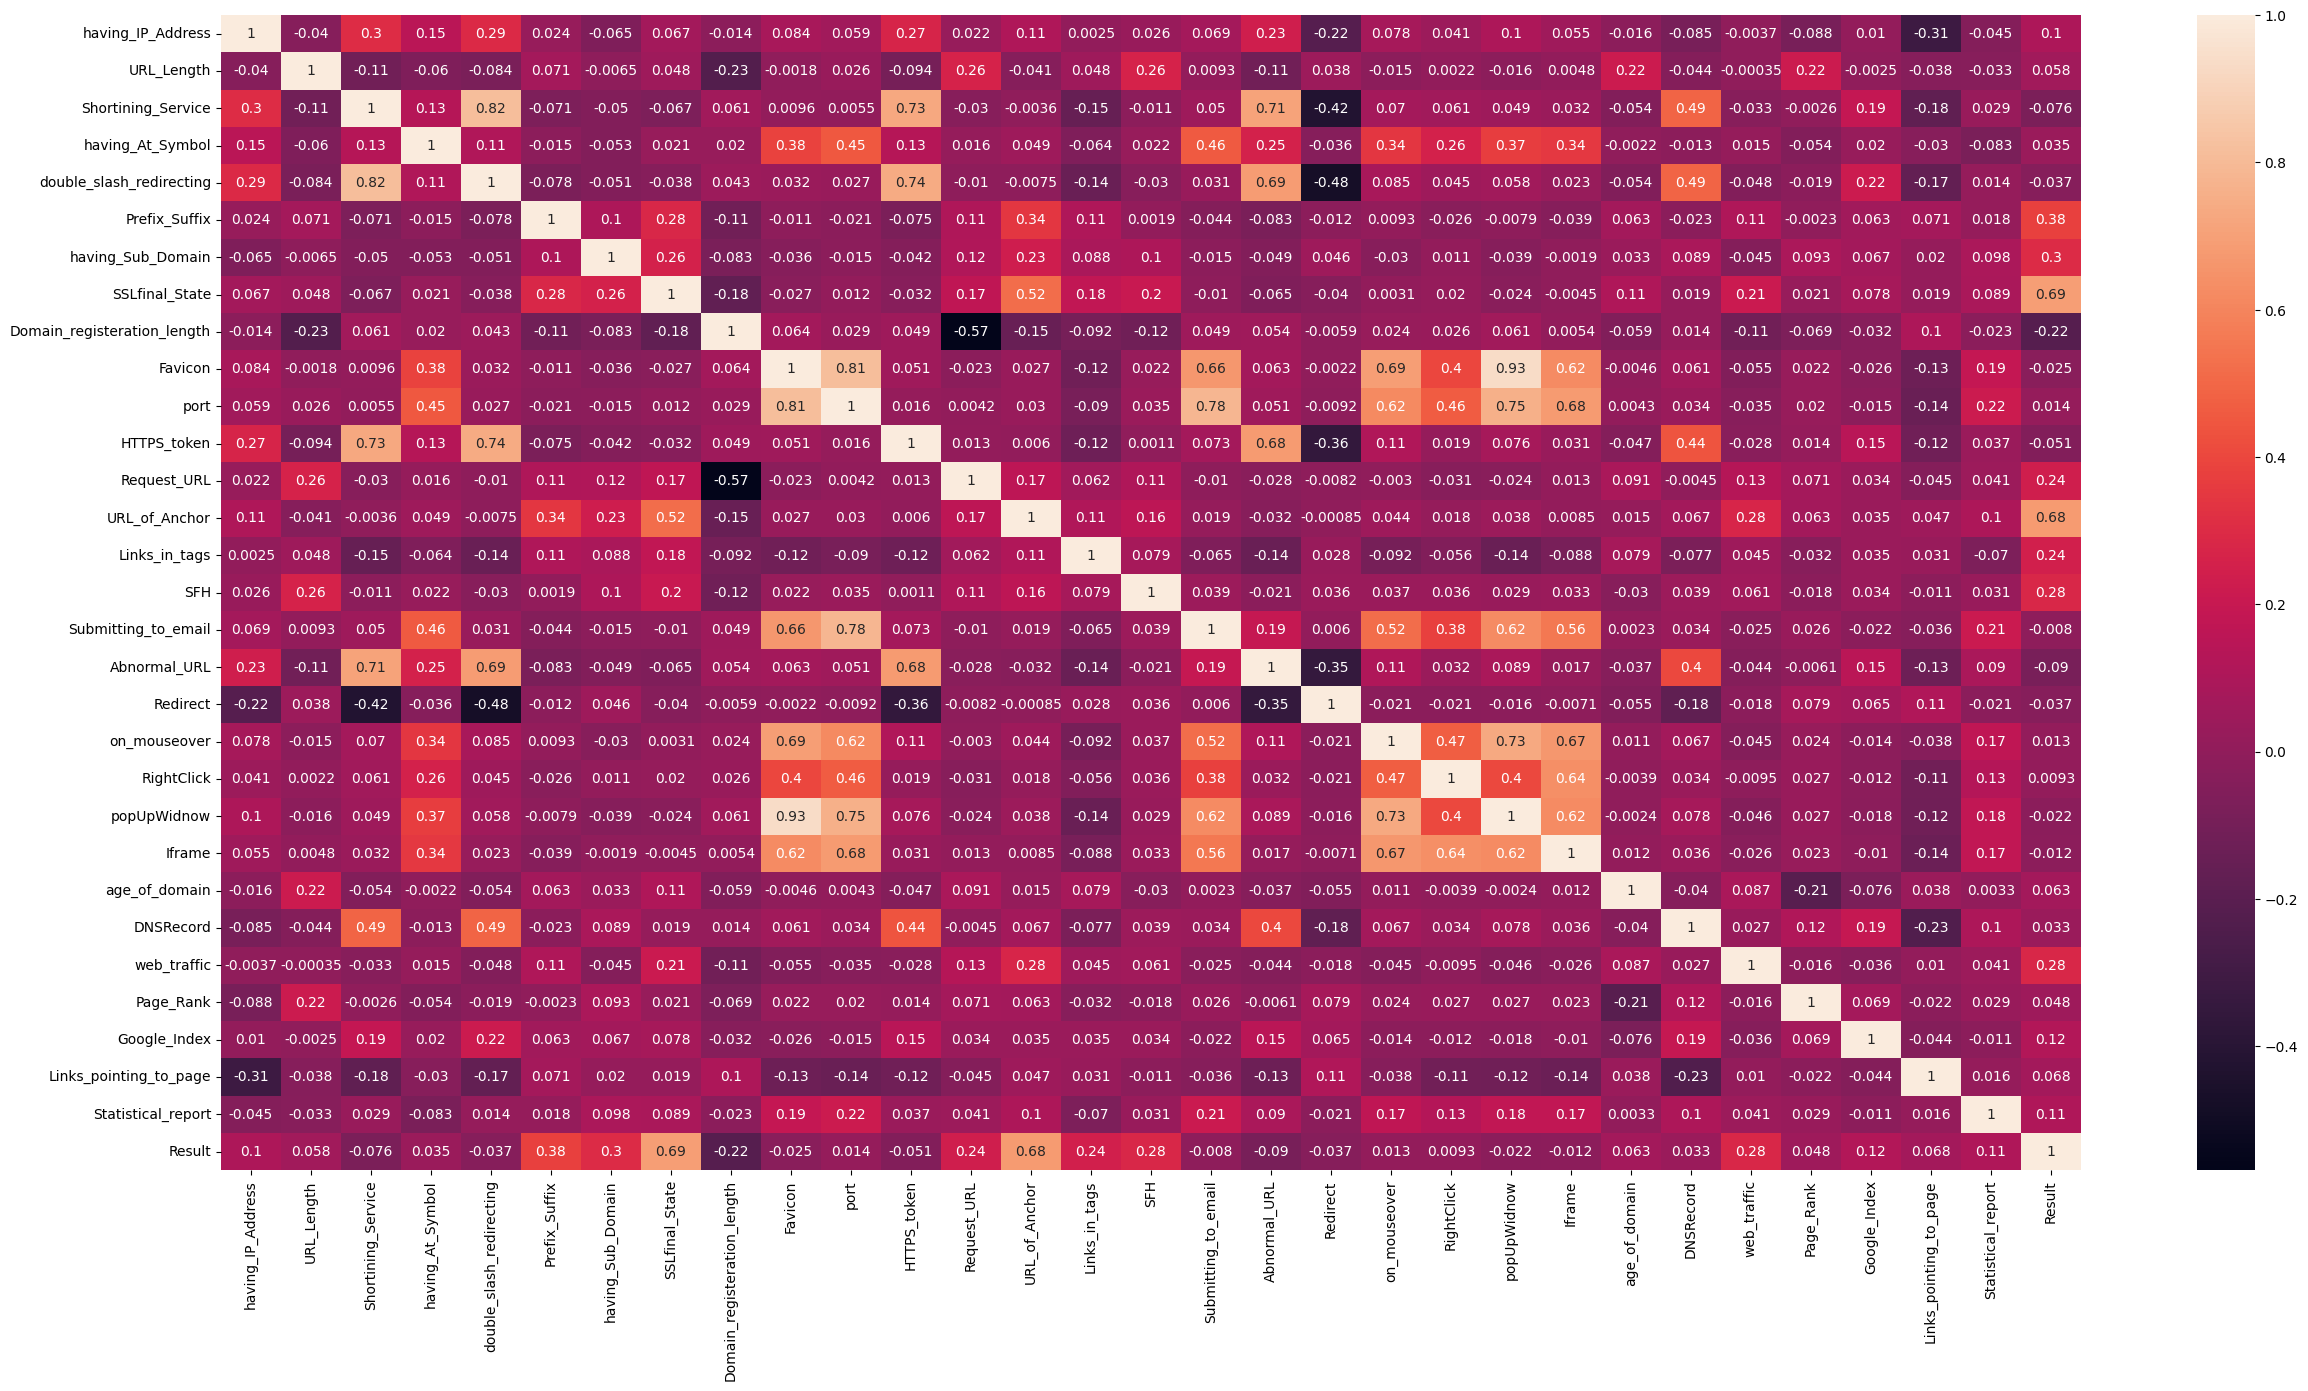

In [9]:
#Plot Confusion correlation matrix

df.corr()

plt.figure(figsize=(30, 15))

sns.heatmap(df.corr(), annot=True)

plt.show()

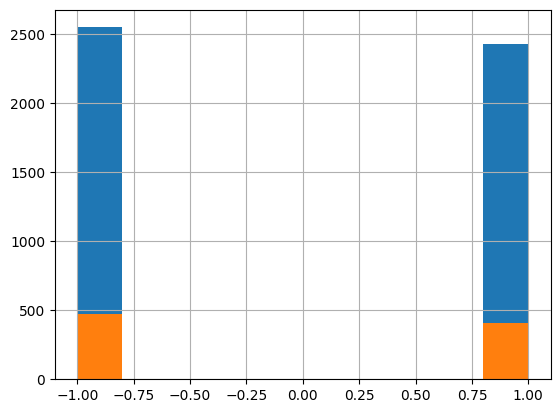

In [10]:
# Split the data into training and testing and save to csv

df.to_csv('./data/normal/full.csv', index=False)

train, test = train_test_split(df, test_size=0.15, random_state=42)

train['Result'].hist()
test['Result'].hist()

train.to_csv('./data/normal/train.csv', index=False)
test.to_csv('./data/normal/test.csv', index=False)

In [29]:
# Data with pca

X = df.drop('Result', axis=1)
Y = df['Result']

pca = PCA(n_components=30)

pca_np = pca.fit_transform(X)

explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative variance explained
cumulative_variance = explained_variance_ratio.cumsum()

print("Explained variance ratio by each component:", explained_variance_ratio)
print("Cumulative variance explained by selected components:", cumulative_variance[-1])


pca_df = pandas.DataFrame(pca_np)
pca_df['Result'] = Y.reset_index(drop=True)

pca_df.to_csv('./data/pca/full.csv', index=False)

train, test = train_test_split(pca_df, test_size=0.15, random_state=42)

train.to_csv('./data/pca/train.csv', index=False)
test.to_csv('./data/pca/test.csv', index=False)

Explained variance ratio by each component: [0.16149834 0.11474244 0.10275964 0.06597314 0.06150883 0.05632797
 0.04243504 0.03805057 0.03454542 0.03306043 0.03017036 0.02758929
 0.02605435 0.02524053 0.0229058  0.02052214 0.01982923 0.01751656
 0.01555565 0.0139893  0.01325902 0.01173886 0.00952362 0.00873009
 0.00656753 0.00512011 0.00455611 0.00429613 0.0038562  0.00207731]
Cumulative variance explained by selected components: 1.0000000000000002
